In [47]:
%reload_ext autoreload
%autoreload 2

In [8]:
import os, sys
import pandas as pd

from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud

from src.loader import NewsDataLoader
import src.utils as utils

ModuleNotFoundError: No module named 'wordcloud'

In [10]:
# Add parent directory to path to import modules from src
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)


In [11]:
if __name__ == "__main__":
    data_directory = "../data"
    loader = NewsDataLoader(data_directory)

    merge_df = loader.load_data()

NameError: name 'NewsDataLoader' is not defined

In [57]:
#  Top and Bottom 10 Websites with the Largest Count of News Articles
top_10_websites = merge_df['source_name'].value_counts().head(10)
bottom_10_websites = merge_df['source_name'].value_counts().tail(10)

print("Top 10 Websites with Largest Count of News Articles:\n", top_10_websites)
print("\nBottom 10 Websites with Smallest Count of News Articles:\n", bottom_10_websites)

Top 10 Websites with Largest Count of News Articles:
 source_name
ETF Daily News        16746
The Times of India     7504
GlobeNewswire          5423
Globalsecurity.org     3119
Forbes                 2784
BBC News               2113
ABC News               2058
Business Insider       2034
The Punch              1800
Al Jazeera English     1664
Name: count, dtype: int64

Bottom 10 Websites with Smallest Count of News Articles:
 source_name
CNA                            674
Time                           600
Android Central                522
Gizmodo.com                    388
ReadWrite                      324
Euronews                       286
Wired                          270
CNN                            267
The Verge                      214
AllAfrica - Top Africa News     20
Name: count, dtype: int64


NameError: name 'top_10_websites' is not defined

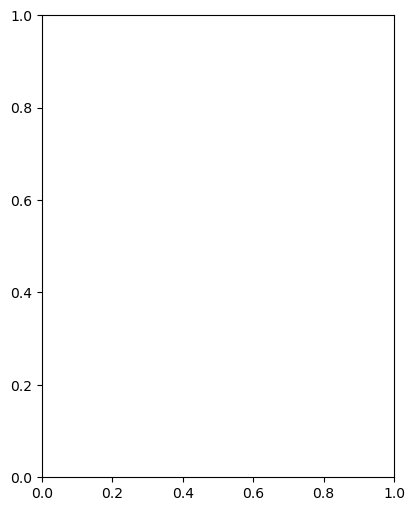

In [12]:

# Plotting
plt.figure(figsize=(10, 6))

# Plot for top 10 websites
plt.subplot(1, 2, 1)
top_10_websites.plot(kind='bar', color='skyblue')
plt.title('Top 10 Websites with Largest Count of News Articles')
plt.xlabel('Website')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')

# Plot for bottom 10 websites
plt.subplot(1, 2, 2)
bottom_10_websites.plot(kind='bar', color='salmon')
plt.title('Bottom 10 Websites with Smallest Count of News Articles')
plt.xlabel('Website')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [42]:
# Websites with the Highest Numbers of Visitors Traffic
websites_traffic = merge_df.groupby('source_name')['GlobalRank'].max().nlargest(10)

print("\nWebsites with Highest Numbers of Visitors Traffic:\n", websites_traffic)


Websites with Highest Numbers of Visitors Traffic:
 source_name
ABC News                      NaN
Al Jazeera English            NaN
AllAfrica - Top Africa News   NaN
Android Central               NaN
BBC News                      NaN
Boing Boing                   NaN
Business Insider              NaN
CNA                           NaN
CNN                           NaN
Deadline                      NaN
Name: GlobalRank, dtype: float64


In [54]:
#  Countries with the Highest Number of News Media Organisations
countries_media_organizations = merge_df['Country'].value_counts()
print("\nCountries with the Highest Number of News Media Organisations:")
print(countries_media_organizations)



Countries with the Highest Number of News Media Organisations:
Series([], Name: count, dtype: int64)


In [55]:
# Countries that have many articles written about them
articles_about_countries = merge_df['Country'].value_counts()
print("\nCountries that have many articles written about them:", articles_about_countries)



Countries that have many articles written about them: Series([], Name: count, dtype: int64)


In [39]:

#  Websites that reported about specific countries or regions
countries_of_interest = ['Africa', 'US', 'China', 'EU', 'Russia', 'Ukraine', 'Middle East']
websites_reporting_about_countries = merge_df[merge_df['Country'].isin(countries_of_interest)]

print("\nWebsites that reported about specific countries or regions:", websites_reporting_about_countries)



Websites that reported about specific countries or regions: Empty DataFrame
Columns: [article_id, source_id, source_name, author, title, description, url, url_to_image, published_at, content, category, article, title_sentiment, SourceCommonName, location, Country, GlobalRank, TldRank, Domain, TLD, RefSubNets, RefIPs, IDN_Domain, IDN_TLD, PrevGlobalRank, PrevTldRank, PrevRefSubNets, PrevRefIPs]
Index: []

[0 rows x 28 columns]


In [51]:

#Websites with the highest count of positive, neutral, and negative sentiment
sentiment_counts_by_website = merge_df.groupby('source_name')['title_sentiment'].value_counts()
print("\nWebsites with the highest count of positive, neutral, and negative sentiment:", sentiment_counts_by_website)



Websites with the highest count of positive, neutral, and negative sentiment: Series([], Name: count, dtype: int64)


In [50]:
# Compare the impact of using mean/average and median

merge_df['title_sentiment'] = pd.to_numeric(merge_df['title_sentiment'], errors='coerce')
impact_mean_average_median = merge_df[['title_sentiment']].agg(['mean', 'median'])

print("\nImpact of using mean/average and median sentiment:", impact_mean_average_median)



Impact of using mean/average and median sentiment:         title_sentiment
mean                NaN
median              NaN


c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [49]:

# Check the distribution of sentiments for a particular domain
top_10_domains_by_traffic = merge_df.groupby('source_name')['GlobalRank'].max().nlargest(10)
sentiment_distribution_for_domain = merge_df[merge_df['source_name'].isin(top_10_domains_by_traffic.index)]['title_sentiment'].value_counts()

print("\nDistribution of sentiments for a particular domain:", sentiment_distribution_for_domain)



Distribution of sentiments for a particular domain: title_sentiment
Neutral     6127
Negative    3784
Positive    1086
Name: count, dtype: int64


In [2]:
plt.figure(figsize=(8, 6))
sentiment_distribution_for_domain.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Sentiments for a Particular Domain')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

In [35]:
# Compare content metadata across sites
content_metadata_comparison = merge_df.groupby('source_name')[['author', 'category']].nunique()
print("\nComparison of content metadata across sites:", content_metadata_comparison)



Comparison of content metadata across sites:                               author  category
source_name                                   
ABC News                         683       199
Al Jazeera English               219       164
AllAfrica - Top Africa News       10         7
Android Central                   25        48
BBC News                          69       185
Boing Boing                       20        97
Business Insider                 472       144
CNA                                0       151
CNN                              174       123
Deadline                          52       152
Digital Trends                    64        75
ETF Daily News                     2       148
Euronews                           2       105
Forbes                          1283       161
Gizmodo.com                       35        82
Globalsecurity.org                 1       193
GlobeNewswire                   1913       178
International Business Times     370       187
Marketscreener

In [3]:
plt.figure(figsize=(10, 6))
content_metadata_comparison.plot(kind='bar')
plt.title('Comparison of Content Metadata Across Sites')
plt.xlabel('Website')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(['Unique Authors', 'Unique Categories'])
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

In [4]:
# Analyze the similarity of message lengths across sites
message_lengths = merge_df.groupby('source_name')['content'].apply(lambda x: x.str.len().mean())
print("\nAnalysis of the similarity of message lengths across sites:", message_lengths)

NameError: name 'merge_df' is not defined

In [5]:
plt.figure(figsize=(10, 6))
message_lengths.plot(kind='bar', color='skyblue')
plt.title('Analysis of Message Lengths Across Sites')
plt.xlabel('Website')
plt.ylabel('Average Message Length')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

In [33]:
# Analyze the similarity of the number of words in titles across sites
title_word_counts = merge_df.groupby('source_name')['title'].apply(lambda x: x.str.split().str.len().mean())
print("\nAnalysis of the similarity of the number of words in titles across sites:", title_word_counts)



Analysis of the similarity of the number of words in titles across sites: source_name
ABC News                        13.480078
Al Jazeera English              10.158654
AllAfrica - Top Africa News      9.950000
Android Central                 12.243295
BBC News                         9.342168
Boing Boing                     12.150070
Business Insider                18.022616
CNA                             10.954006
CNN                             13.235955
Deadline                        15.516094
Digital Trends                  10.858418
ETF Daily News                  10.767945
Euronews                        11.678322
Forbes                          10.323635
Gizmodo.com                     10.461340
Globalsecurity.org              12.125361
GlobeNewswire                   15.456021
International Business Times     9.658658
Marketscreener.com              11.414097
NPR                             11.771662
Phys.Org                        11.306413
RT                             

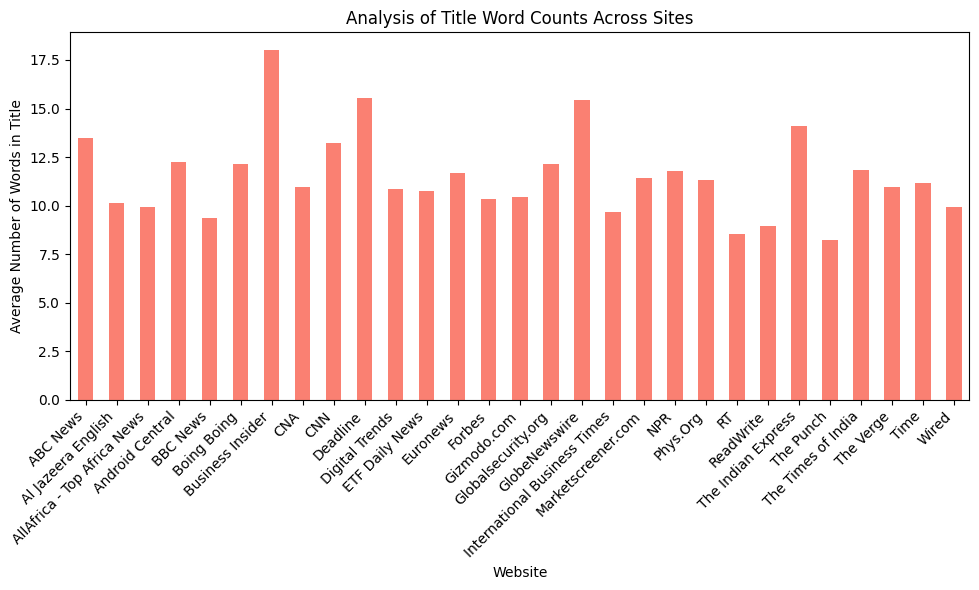

In [63]:
plt.figure(figsize=(10, 6))
title_word_counts.plot(kind='bar', color='salmon')
plt.title('Analysis of Title Word Counts Across Sites')
plt.xlabel('Website')
plt.ylabel('Average Number of Words in Title')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

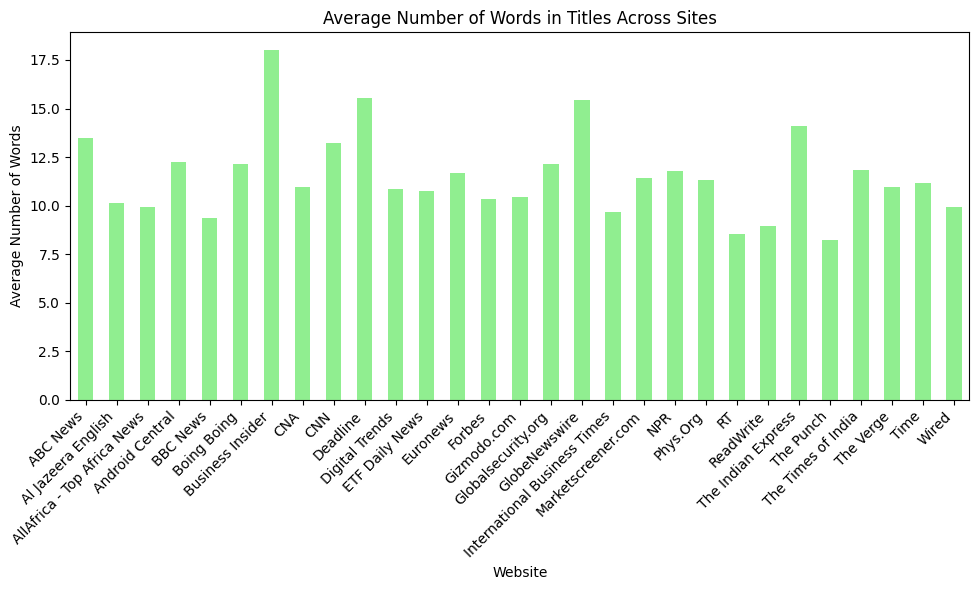

In [59]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot the average number of words in titles
title_word_counts.plot(kind='bar', color='lightgreen')
plt.title('Average Number of Words in Titles Across Sites')
plt.xlabel('Website')
plt.ylabel('Average Number of Words')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

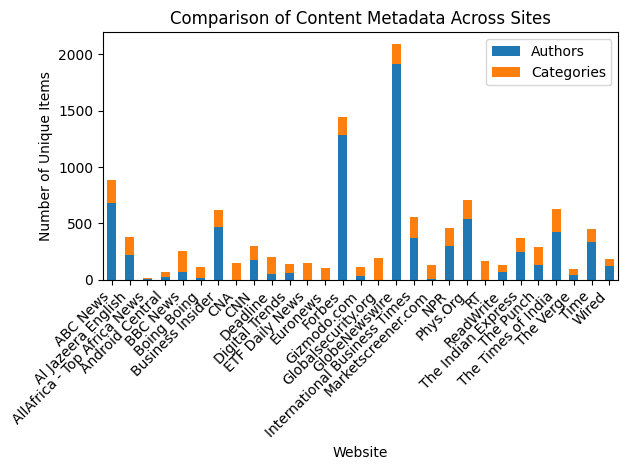

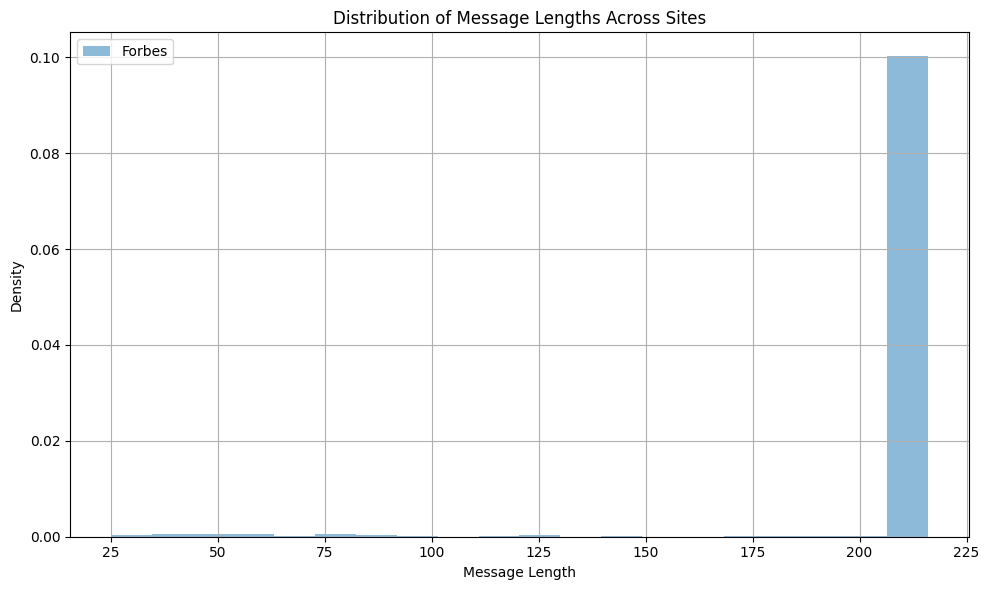

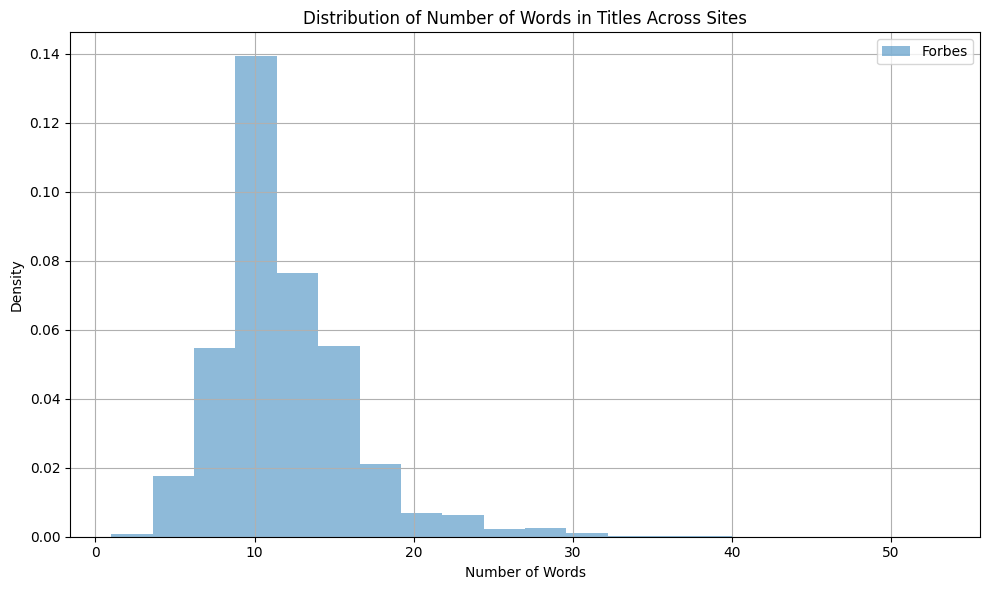

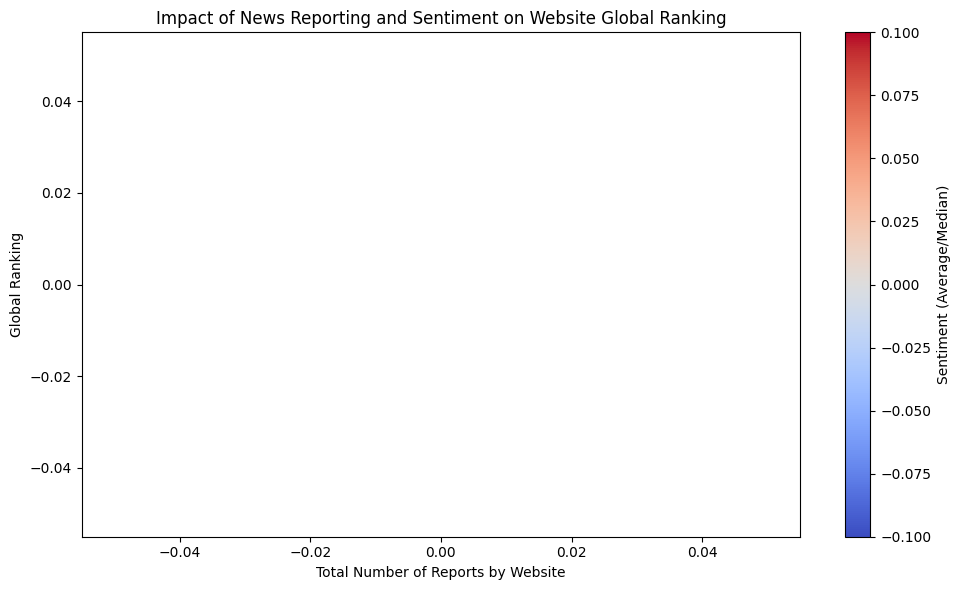

In [60]:

# Compare content metadata across sites
plt.figure(figsize=(10, 6))
content_metadata_comparison.plot(kind='bar', stacked=True)
plt.title('Comparison of Content Metadata Across Sites')
plt.xlabel('Website')
plt.ylabel('Number of Unique Items')
plt.xticks(rotation=45, ha='right')
plt.legend(['Authors', 'Categories'])
plt.tight_layout()
plt.show()


In [ ]:
# Similarity of raw message lengths across sites
plt.figure(figsize=(10, 6))
merge_df.groupby('source_name')['content'].apply(lambda x: x.str.len()).hist(alpha=0.5, bins=20, density=True)
plt.title('Distribution of Message Lengths Across Sites')
plt.xlabel('Message Length')
plt.ylabel('Density')
plt.legend(merge_df['source_name'].unique())
plt.tight_layout()
plt.show()

In [6]:

# Similarity of number of words in titles across sites
plt.figure(figsize=(10, 6))
merge_df.groupby('source_name')['title'].apply(lambda x: x.str.split().str.len()).hist(alpha=0.5, bins=20, density=True)
plt.title('Distribution of Number of Words in Titles Across Sites')
plt.xlabel('Number of Words')
plt.ylabel('Density')
plt.legend(merge_df['source_name'].unique())
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

In [7]:

# Impact of frequent news reporting and sentiment on website’s global ranking
plt.figure(figsize=(10, 6))
plt.scatter(impact_news_reporting_sentiment['article_id'], impact_news_reporting_sentiment['GlobalRank'], c=impact_news_reporting_sentiment['title_sentiment'], cmap='coolwarm') # type: ignore
plt.title('Impact of News Reporting and Sentiment on Website Global Ranking')
plt.xlabel('Total Number of Reports by Website')
plt.ylabel('Global Ranking')
plt.colorbar(label='Sentiment (Average/Median)')
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined